Polynomial degree: 0
Error: 0.07652685281448748
Bias^2: 0.07606007435295238
Var: 0.0004667784615351138
0.07652685281448748 >= 0.07606007435295238 + 0.0004667784615351138 = 0.0765268528144875
Polynomial degree: 1
Error: 0.07663314749813556
Bias^2: 0.07590872686021137
Var: 0.0007244206379241792
0.07663314749813556 >= 0.07590872686021137 + 0.0007244206379241792 = 0.07663314749813555
Polynomial degree: 2
Error: 0.056410403544564024
Bias^2: 0.05535901689649304
Var: 0.001051386648070976
0.056410403544564024 >= 0.05535901689649304 + 0.001051386648070976 = 0.05641040354456402
Polynomial degree: 3
Error: 0.05634623092568808
Bias^2: 0.05509363425611796
Var: 0.001252596669570119
0.05634623092568808 >= 0.05509363425611796 + 0.001252596669570119 = 0.05634623092568808
Polynomial degree: 4
Error: 0.04196236276188005
Bias^2: 0.04058456044625173
Var: 0.0013778023156283282
0.04196236276188005 >= 0.04058456044625173 + 0.0013778023156283282 = 0.041962362761880055
Polynomial degree: 5
Error: 0.042670779035

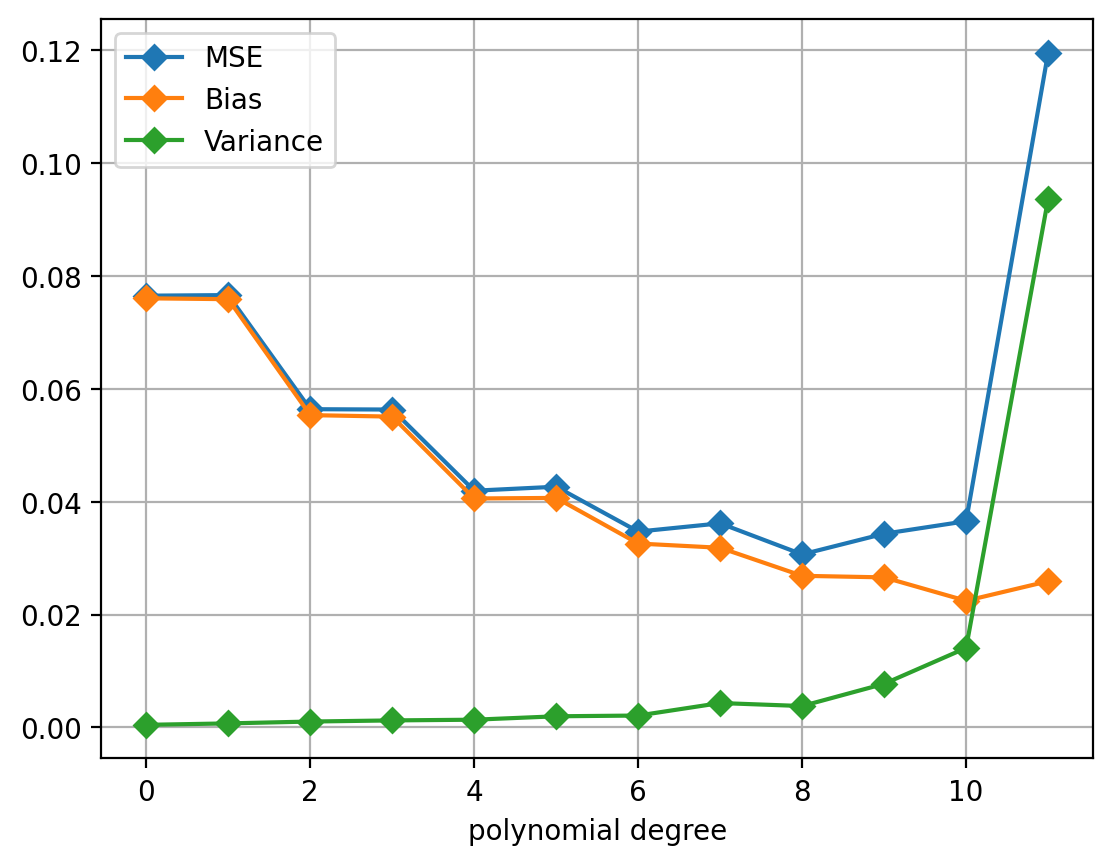

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(122)
n = 100
n_boostraps = 1000
maxdegree = 12
f = lambda x: 1/(1+25*x**2)

# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = f(x) + np.random.normal(0, 0.1, x.shape)
error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_ = resample(x_train, y_train)
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

    polydegree[degree] = degree
    error[degree] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    print('Polynomial degree:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))
plt.figure(dpi = 200)
plt.grid()
plt.xlabel("polynomial degree")
plt.plot(polydegree, error, "-D",label='MSE')
plt.plot(polydegree, bias, "-D", label='Bias')
plt.plot(polydegree, variance, "-D", label='Variance')
plt.legend()
plt.show()

Polynomial degree: 8
Error: 0.2712674717308289
Bias^2: 0.03521195915618435
Var: 0.23605551257464452
0.2712674717308289 >= 0.03521195915618435 + 0.23605551257464452 = 0.2712674717308289
Polynomial degree: 8
Error: 0.13378699817480588
Bias^2: 0.01401965493036398
Var: 0.11976734324444188
0.13378699817480588 >= 0.01401965493036398 + 0.11976734324444188 = 0.13378699817480585
Polynomial degree: 8
Error: 0.05048942790210431
Bias^2: 0.01721291433248405
Var: 0.03327651356962027
0.05048942790210431 >= 0.01721291433248405 + 0.03327651356962027 = 0.05048942790210432
Polynomial degree: 8
Error: 0.01794134826419824
Bias^2: 0.014760941810031954
Var: 0.0031804064541662855
0.01794134826419824 >= 0.014760941810031954 + 0.0031804064541662855 = 0.01794134826419824


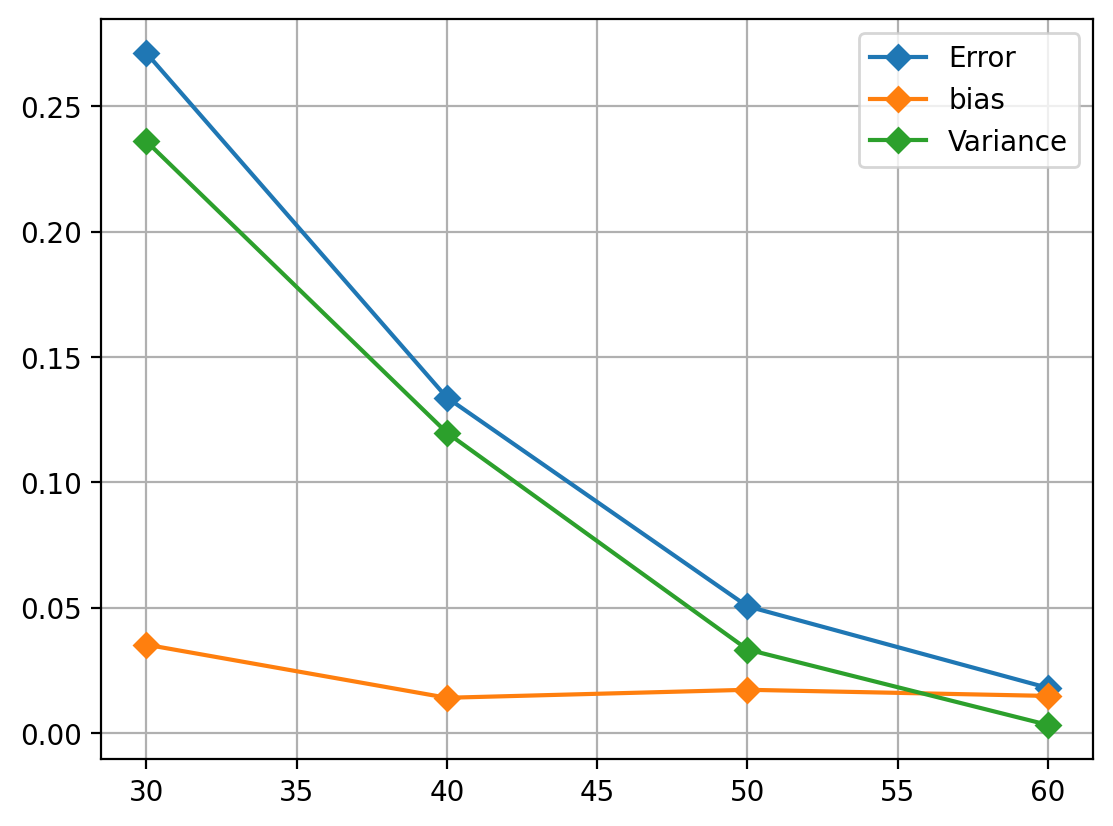

In [ ]:
#various n evaluated with bootstrap

np.random.seed(122)
n_boostraps = 1000
degree = 8

values_n = np.array([30,40,50,60])
# Make data set.
x = np.linspace(-1,1, int(np.max(values_n)/0.8+2)).reshape(-1, 1)
y = f(x) + np.random.normal(0, 0.1, x.shape)
error = np.zeros(len(values_n))
bias = np.zeros(len(values_n))
variance = np.zeros(len(values_n))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

for k, n in enumerate(values_n):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    x_train_n, x_discard, y_train_n, y_discard = train_test_split(x_train, y_train, train_size = n)
    for i in range(n_boostraps):
        x_, y_ = resample(x_train_n, y_train_n)
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

    error[k] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias[k] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance[k] = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    print('Polynomial degree:', degree)
    print('Error:', error[k])
    print('Bias^2:', bias[k])
    print('Var:', variance[k])
    print('{} >= {} + {} = {}'.format(error[k], bias[k], variance[k], bias[k]+variance[k]))
plt.figure(dpi = 200)
plt.grid()
plt.plot(values_n, error,"-D", label='Error')
plt.plot(values_n, bias, "-D", label='bias')
plt.plot(values_n, variance, "-D", label='Variance')
plt.legend()
plt.show()